In [66]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

public_transport_fp = "data/citybahn_cologne_withoutbonn_buffered.geojson"
clubs_fp = "data/clubs_cologne.geojson"

# Read files
public_transport = gpd.read_file(public_transport_fp)
clubs = gpd.read_file(clubs_fp)

# check crs
print(public_transport.crs, clubs.crs)
print(f"Layer crs: {CRS(public_transport.crs).name}")
# crs is wgs84 so not projected

epsg:4326 epsg:4326
Layer crs: WGS 84


In [67]:
public_transport = public_transport.to_crs(epsg=3857)
clubs = clubs.to_crs(epsg=3857)

# should be ETRS89 UTM32N
print(f"Layer crs: {CRS(clubs.crs).name}")
# should be true
public_transport.crs == clubs.crs
ctx.providers.Stamen.keys()

Layer crs: WGS 84 / Pseudo-Mercator


dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TopOSMRelief', 'TopOSMFeatures'])

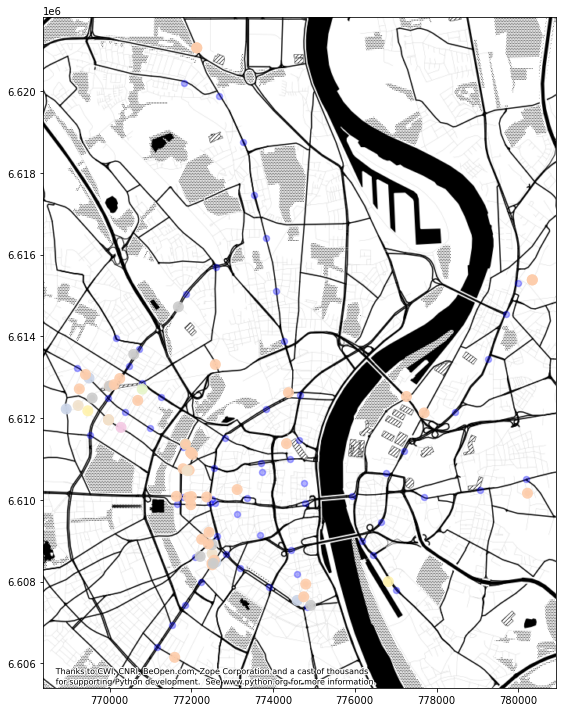

In [88]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(13,10))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
public_transport.plot(ax=ax, color="blue", linewidth=1.5,  alpha=0.3)

clubs.plot(ax=ax, column="musik", linewidth=5, cmap="Pastel2", alpha=0.9)
ctx.add_basemap(ax, zoom=13, attribution=credits, source=ctx.providers.Stamen.TonerBackground)

# Remove the empty white-space around the axes
plt.tight_layout()

In [200]:
# import libs
import folium
from folium.plugins import HeatMap
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster


# load data
public_transport_fp = "data/citybahn_cologne.geojson"
clubs_fp = "data/clubs_cologne.geojson"
public_transport = gpd.read_file(public_transport_fp)
clubs = gpd.read_file(clubs_fp)

my_tooltip = folium.features.GeoJsonTooltip(
    fields=["club", "strasse", "musik"],
    aliases=["Name:", "Street:", "Genres:"],
    labels=True,
    sticky=False
)

# create popup
my_popup = folium.features.GeoJsonPopup(
    fields=["club", "strasse", "musik"],
    aliases=["Name:", "Street:", "Genres:"],
    localize=True,
    parse_html=True
)

# add folium point data
clubs_folium =  folium.features.GeoJson(clubs, name="Clubs Cologne", popup=my_popup, tooltip=my_tooltip)
public_transport_folium = folium.features.GeoJson(public_transport, name="Tram Stations Cologne-Bonn",)

# create folium instance
m = folium.Map(location=[50.93, 6.96], zoom_start=13, control_scale=True,  tiles = 'cartodbpositron')

clubs_folium.add_to(m)

# Create a list of coordinate pairs
HeatMap(locations).add_to(m)
#public_transport_folium.add_to(m, show=False)
folium.LayerControl().add_to(m)

m

outfp = "clubs_cologne.html"
m.save(outfp)

AttributeError: module 'folium' has no attribute 'add_to'

In [167]:
clubs

,objectid,club,strasse,plz,stadt,eroeffnung,website,genre_elek,genre_disc,genre_exp,...,genre_lati,genre_indi,genre_sing,genre_jazz,genre_sons,status,musik,geometry,x,y
0,1,Club Bahnhof Ehrenfeld,Bartholomäus-Schink-Straße 65/67,50825,Köln,2004,http://www.cbe-cologne.de,Ja,Ja,Nein,...,Ja,Ja,Ja,Ja,,geöffnet,Electronica & More,POINT (6.91702 50.95186),6.917016,50.951861
1,2,YUCA,Bartholomäus-Schink-Straße 65/67,50825,Köln,2015,http://www.yuca.club,,Ja,Nein,...,Ja,Ja,Ja,Ja,,geöffnet,Soul/Latin/RnB,POINT (6.91702 50.95186),6.917016,50.951861
2,3,Bootshaus,Auenweg 173,51063,Köln,2004,http://www.bootshaus.tv,Ja,Ja,Ja,...,Nein,Nein,Nein,Nein,,geöffnet,Electronica & More,POINT (6.98228 50.95042),6.982282,50.950421
3,4,Die Kantine,Neusser Landstraße 2,50735,Köln,1991,https://kantine.com,Ja,Ja,Nein,...,Ja,Ja,Ja,Nein,,geöffnet,Electronica & More,POINT (6.93618 50.99868),6.936180,50.998680
4,5,King Georg Klubbar,Sudermanstraße 2,50670,Köln,1968 generell \nAndre Sauer 2008 - 2019\nMiles...,http://www.kinggeorg.de,Ja,Ja,Nein,...,Ja,Ja,Nein,Ja,,geöffnet,Electronica & More,POINT (6.95634 50.95096),6.956338,50.950956
5,6,Club Subway,Aachener Straße 82-84,50674,Köln,1970,https://www.subway-der-club.de/,Ja,Nein,Ja,...,Nein,Ja,Ja,Ja,,geöffnet,Electronica & More,POINT (6.93171 50.93660),6.931710,50.936595
6,7,Spirits,Engelbertstraße 21,50674,Köln,1999,http://spiritsbar.de,Ja,Ja,Nein,...,Ja,Nein,Nein,Ja,,geöffnet,Electronica & More,POINT (6.93888 50.93161),6.938879,50.931610
7,8,Bar Franck & Die Alte Backstube,Eichendorffstraße 30,50825,Köln,2004,http://www.cafe-franck.de,1,1,Nein,...,Nein,Ja,Ja,Ja,,geöffnet,Soul/Latin/RnB,POINT (6.92233 50.95626),6.922331,50.956260
8,9,Herbrand's,Herbrandsstraße 21,50825,Köln,1993,https://herbrands.de/,Ja,Ja,Ja,...,Ja,Ja,Ja,Ja,,geöffnet,Electronica & More,POINT (6.91036 50.95147),6.910364,50.951472
9,10,Stereo Wonderland,Trierer Straße 65,50674,Köln,2003,http://www.stereowonderland.com/,Nein,Nein,Ja,...,Nein,Ja,Ja,Nein,"Garage, Sixties",geöffnet,Experimental,POINT (6.94040 50.92749),6.940401,50.927493
